**Import Libraries**

In [32]:
import math, numpy as np, matplotlib.pyplot as plt

**Function Definition** **bold text**

In [33]:
def calculate_hvl(initial_intensity, attenuation_factor):
    """
    Calculate the half-value layer (HVL) using the given attenuation factor.

    Args:
        initial_intensity (float): Initial radiation intensity (in watt per steradian).
        attenuation_factor (float): Attenuation factor (in cm^-1).

    Returns:
        float: Half-value layer (in cm).
    """
    if attenuation_factor <= 0:
        raise ValueError("Attenuation factor must be greater than zero.")
    hvl = math.log(2) / attenuation_factor
    return hvl

def calculate_buildup_factor(penetration_depth, attenuation_factor):
    """
    Calculate the buildup factor (B) for radiation penetration.

    Args:
        penetration_depth (float): Depth of penetration (in cm).
        attenuation_factor (float): Attenuation factor (in cm^-1).

    Returns:
        float: Buildup factor.
    """
    if penetration_depth < 0:
        raise ValueError("Penetration depth cannot be negative.")
    B = math.exp(attenuation_factor * penetration_depth)
    return B

def calculate_dose_rate(intensity, conversion_factor, time, distance):
    """
    Calculate the dose rate based on the given parameters.

    Args:
        intensity (float): Radiation intensity (in watt per steradian).
        conversion_factor (float): Conversion factor for dose calculation.
        time (float): Time of exposure (in seconds).
        distance (float): Distance from the radiation source (in cm).

    Returns:
        float: Dose rate (in Gy/s).
    """
    if intensity <= 0:
        raise ValueError("Intensity must be greater than zero.")
    if conversion_factor <= 0:
        raise ValueError("Conversion factor must be greater than zero.")
    if time < 0:
        raise ValueError("Time cannot be negative.")
    if distance <= 0:
        raise ValueError("Distance must be greater than zero.")
    dose_rate = (intensity * conversion_factor * time) / (distance ** 2)
    return dose_rate

def bethe_bloch(energy, z, A, Z, I):
    """
    Simulate the Bethe-Bloch equation to calculate energy loss.

    Args:
        energy (float): Kinetic energy of the charged particle (in MeV).
        z (float): Charge of the particle (in elementary charge units).
        A (float): Atomic mass of the material.
        Z (float): Atomic number of the material.
        I (float): Mean ionization potential of the material (in eV).

    Returns:
        float: Energy loss of the particle (in MeV/cm).
    """
    if energy <= 0:
        raise ValueError("Energy must be greater than zero.")
    if z <= 0:
        raise ValueError("Charge must be greater than zero.")
    if A <= 0:
        raise ValueError("Atomic mass must be greater than zero.")
    if Z <= 0:
        raise ValueError("Atomic number must be greater than zero.")
    if I <= 0:
        raise ValueError("Mean ionization potential must be greater than zero.")

    beta = np.sqrt(2 * energy / (energy + 2 * 0.511))  # Calculate beta (velocity/c speed)
    denominator = 1 - beta**2
    if denominator < 1e-10:  # Check if denominator is close to zero
        gamma = 1.0  # Set default value for gamma
    else:
        gamma = 1 / np.sqrt(denominator)  # Calculate gamma (Lorentz factor)
    W_max = (2 * 0.511 * beta**2 * gamma**2) / (1 + 2 * gamma * 0.511 / energy + (0.511 / energy)**2)  # Calculate maximum energy transfer
    delta = 0.5 * np.log(2 * 0.511 * beta**2 * gamma**2 * W_max / (I**2))  # Calculate density effect correction
    K = 0.307  # K constant (in MeV cm^2/mol)

    # Calculate energy loss using the Bethe-Bloch equation
    dE_dx = (K * z**2 * Z * (1 / beta**2)) * (0.5 * np.log(2 * 0.511 * beta**2 * gamma**2 * W_max / (I**2)) - beta**2 - delta)

    return dE_dx

def generate_bragg_curve(alpha, p, shallowest_depth, deepest_depth, N=201, dmax=20.0):
    """
    Generate and plot the Bragg curve for protons in air.

    Args:
        alpha (float): Empirical constant for protons in air.
        p (float): Empirical exponent for protons in air.
        shallowest_depth (float): Shallowest part of the dose interval (in cm).
        deepest_depth (float): Deepest part of the dose interval (in cm).
        N (int): Number of grid points (default: 201).
        dmax (float): Maximum depth up to which to generate model output (default: 20.0).

    Returns:
        None
    """
    if alpha <= 0:
        raise ValueError("Alpha must be greater than zero.")
    if p <= 0:
        raise ValueError("P must be greater than zero.")
    if shallowest_depth < 0:
        raise ValueError("Shallowest depth cannot be negative.")
    if deepest_depth <= shallowest_depth:
        raise ValueError("Deepest depth must be greater than the shallowest depth.")
    if N <= 0:
        raise ValueError("Number of grid points must be greater than zero.")
    if dmax <= 0:
        raise ValueError("Maximum depth must be greater than zero.")

    def g(d):
        return np.piecewise(d, [d < 0, d > 0], [0, lambda d: 1.0 / (p * (alpha**(1.0/p)) * d**(1.0 - 1.0/p))])

    d = np.linspace(0, dmax, N)
    Bragg_peak = g(deepest_depth - d)

    plt.plot(d, Bragg_peak, linewidth=2)
    plt.title("Bragg Curve for Protons in Air")
    plt.xlabel("Depth (cm)")
    plt.ylabel("Dose")
    plt.grid(True)
    plt.ylim(0, np.max(Bragg_peak) * 1.1)
    plt.show()

def calculate_attenuation(I0, mu, x):
    """
    Calculate radiation attenuation using the general formula.

    Args:
        I0 (float): Initial radiation intensity (in watt per steradian)
        mu (float): Attenuation coefficient (in cm^-1).
        x (float): Distance or thickness of the material (in cm).

    Returns:
        float: Attenuated radiation intensity 
    """
    if I0 <= 0:
        raise ValueError("Initial radiation intensity must be greater than zero.")
    if mu <= 0:
        raise ValueError("Attenuation coefficient must be greater than zero.")
    if x < 0:
        raise ValueError("Distance or thickness cannot be negative.")
    
    I = I0 * np.exp(-mu * x)
    return I


Test ***Functions***

In [34]:
intensity = 10
conversion_factor = 0.5
time = 2
distance = 3

result = calculate_dose_rate(intensity, conversion_factor, time, distance)
print("Dose Rate:", result)

Dose Rate: 1.1111111111111112


In [35]:
initial_intensity = 100
attenuation_factor = 0.1

result = calculate_hvl(initial_intensity, attenuation_factor)
print("Half-Value Layer (HVL):", result)

Half-Value Layer (HVL): 6.931471805599452


In [36]:
penetration_depth = 5
attenuation_factor = 0.2

result = calculate_buildup_factor(penetration_depth, attenuation_factor)
print("Buildup Factor (B):", result)

Buildup Factor (B): 2.718281828459045


In [37]:
# Example usage - Photons in air

initial_intensity = 10.0  # Initial radiation intensity  
attenuation_coefficient = 0.5  # Attenuation coefficient in cm^-1
distance = 2.0  # Distance or thickness of the material in cm

attenuated_intensity = calculate_attenuation(initial_intensity, attenuation_coefficient, distance)
print("Attenuated Intensity:", attenuated_intensity)

Attenuated Intensity: 3.6787944117144233


In [38]:
# Example usage - Protons in Air
kinetic_energy = 100  # MeV
charge = 1  # Elementary charge units
atomic_mass = 28.09  # g/mol
atomic_number = 14
ionization_potential = 78  # eV

energy_loss = bethe_bloch(kinetic_energy, charge, atomic_mass, atomic_number, ionization_potential)
print("Energy Loss:", energy_loss, "MeV/cm")

Energy Loss: -4.297999999999999 MeV/cm


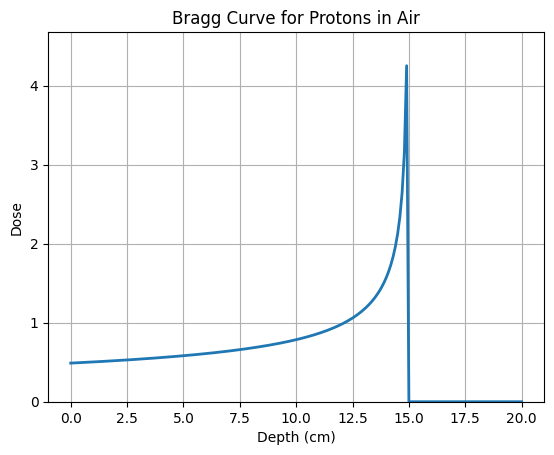

In [39]:
# Example usage - protons in air
alpha = 0.1666
p = 1.76
shallowest_depth = 10.0
deepest_depth = 15.0

generate_bragg_curve(alpha, p, shallowest_depth, deepest_depth)